In [3]:
import pandas as pd #Importing require libraries
import numpy as np
import plotly.express as px

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
titanic = pd.read_csv('Titanic_train.csv') #Importing dataset
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
285,286,0,3,"Stankovic, Mr. Ivan",male,33.0,0,0,349239,8.6625,NaN,C
393,394,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,35273,113.2750,D36,C
494,495,0,3,"Stanley, Mr. Edward Roland",male,21.0,0,0,A/4 45380,8.0500,NaN,S
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S


In [6]:
titanic.info() #Get information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.isnull().mean() * 100 #Checking for missing values

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [8]:
titanic.drop('Cabin',axis=1,inplace=True) #Droping the Cabin column
titanic.head()

In [9]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True) #Filling the missing values with mean
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
titanic['Embarked'].isnull().sum()  #Finding null values in embarked column

2

In [11]:
titanic[titanic['Embarked'].isnull()] #Find what are the null columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [12]:
titanic['Embarked'].value_counts() #Finding count of each unique column in the embarked column

,count
Embarked,
S,644
C,168
Q,77


In [13]:
titanic['Embarked'] = titanic['Embarked'].fillna('S') #Filling null values with "S" in embarked column
titanic.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [14]:
titanic = titanic.drop(columns=['PassengerId','Name','Ticket']) #droping unwanted columns in the dataset
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
titanic.describe() #Getting statistical information about the data

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Finding count of each unique column in every column

In [16]:
titanic['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [17]:
titanic['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [18]:
titanic['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [19]:
titanic['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [20]:
titanic['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [21]:
data = titanic['Survived'].value_counts().reset_index()
data

,Survived,count
0,0,549
1,1,342


### Ploting bar plot for every category column

In [22]:
fig = px.bar(data,x='Survived',y='count',template='plotly_dark',text_auto=True,color='Survived')
fig.update_traces(marker_line_color='white',marker_line_width=1.2)
fig.update_layout(title='Bar Plot for Survived Column',
                 title_x=0.5,
                 xaxis_title='Survived',
                 yaxis_title='Frequency Count')
fig.show()


In [23]:
data = titanic['Pclass'].value_counts().reset_index()
fig = px.bar(data,x='Pclass',y='count',template='plotly_dark',text_auto=True,color='Pclass')
fig.update_traces(marker_line_color='white',marker_line_width=1.2)
fig.update_layout(title='Bar Plot for Pclass Column',
                 title_x=0.5,
                 xaxis_title='Pclass',
                 yaxis_title='Frequency Count')
fig.show()

In [24]:
data = titanic['Sex'].value_counts().reset_index()
fig = px.bar(data,x='Sex',y='count',template='plotly_dark',text_auto=True,color='Sex')
fig.update_traces(marker_line_color='white',marker_line_width=1.2)
fig.update_layout(title='Bar Plot for Sex Column',
                 title_x=0.5,
                 xaxis_title='Sex',
                 yaxis_title='Frequency Count')
fig.show()

In [25]:
data = titanic['SibSp'].value_counts().reset_index()
fig = px.bar(data,x='SibSp',y='count',template='plotly_dark',text_auto=True,color='SibSp')
fig.update_traces(marker_line_color='white',marker_line_width=1.2)
fig.update_layout(title='Bar Plot for SibSp Column',
                 title_x=0.5,
                 xaxis_title='SibSp',
                 yaxis_title='Frequency Count')
fig.show()

In [26]:
data = titanic['Parch'].value_counts().reset_index()
fig = px.bar(data,x='Parch',y='count',template='plotly_dark',text_auto=True,color='Parch')
fig.update_traces(marker_line_color='white',marker_line_width=1.2)
fig.update_layout(title='Bar Plot for Parch Column',
                 title_x=0.5,
                 xaxis_title='Parch',
                 yaxis_title='Frequency Count')
fig.show()

In [27]:
data = titanic['Embarked'].value_counts().reset_index()
fig = px.bar(data,x='Embarked',y='count',template='plotly_dark',text_auto=True,color='Embarked')
fig.update_traces(marker_line_color='white',marker_line_width=1.2)
fig.update_layout(title='Bar Plot for Embarked Column',
                 title_x=0.5,
                 xaxis_title='Embarked',
                 yaxis_title='Frequency Count')
fig.show()

In [28]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Ploting distibution plot for every continues variable in dataset

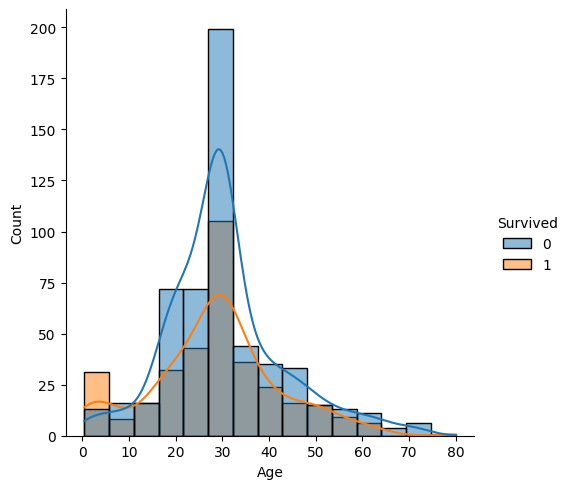

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(data=titanic,x='Age',hue='Survived',kde=True,fill=True,bins=15)
plt.show()

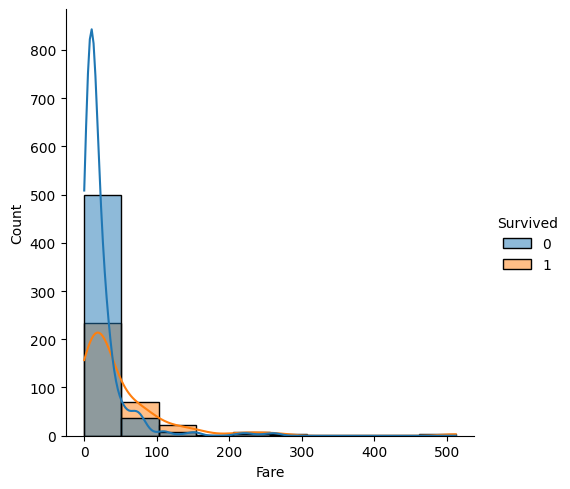

In [30]:
sns.displot(data=titanic,x='Fare',hue='Survived',kde=True,fill=True,bins=10)
plt.show()

In [31]:
fig = px.histogram(titanic,x='Fare',template='plotly_dark',nbins=10)
fig.update_layout(title='Histogram for Fare Column',
                 title_x=0.5,
                 xaxis_title='Fare',
                 yaxis_title='Frequency')
fig.show()

In [32]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [33]:
from sklearn.preprocessing import LabelEncoder # Performing encoding technique using label encoder
le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic['Embarked'] = le.fit_transform(titanic['Embarked'])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


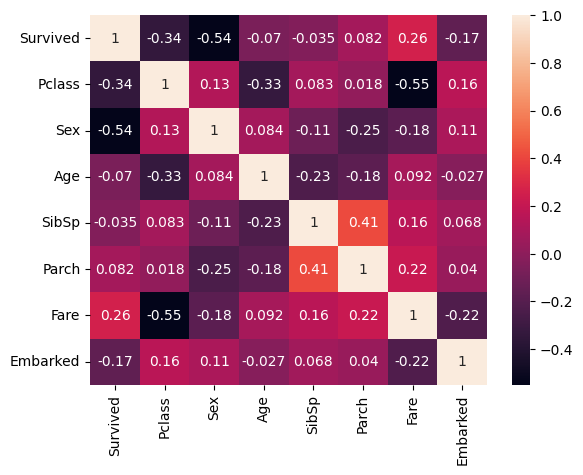

In [34]:
sns.heatmap(titanic.corr(),annot=True) # Ploting correlation plot
plt.show()

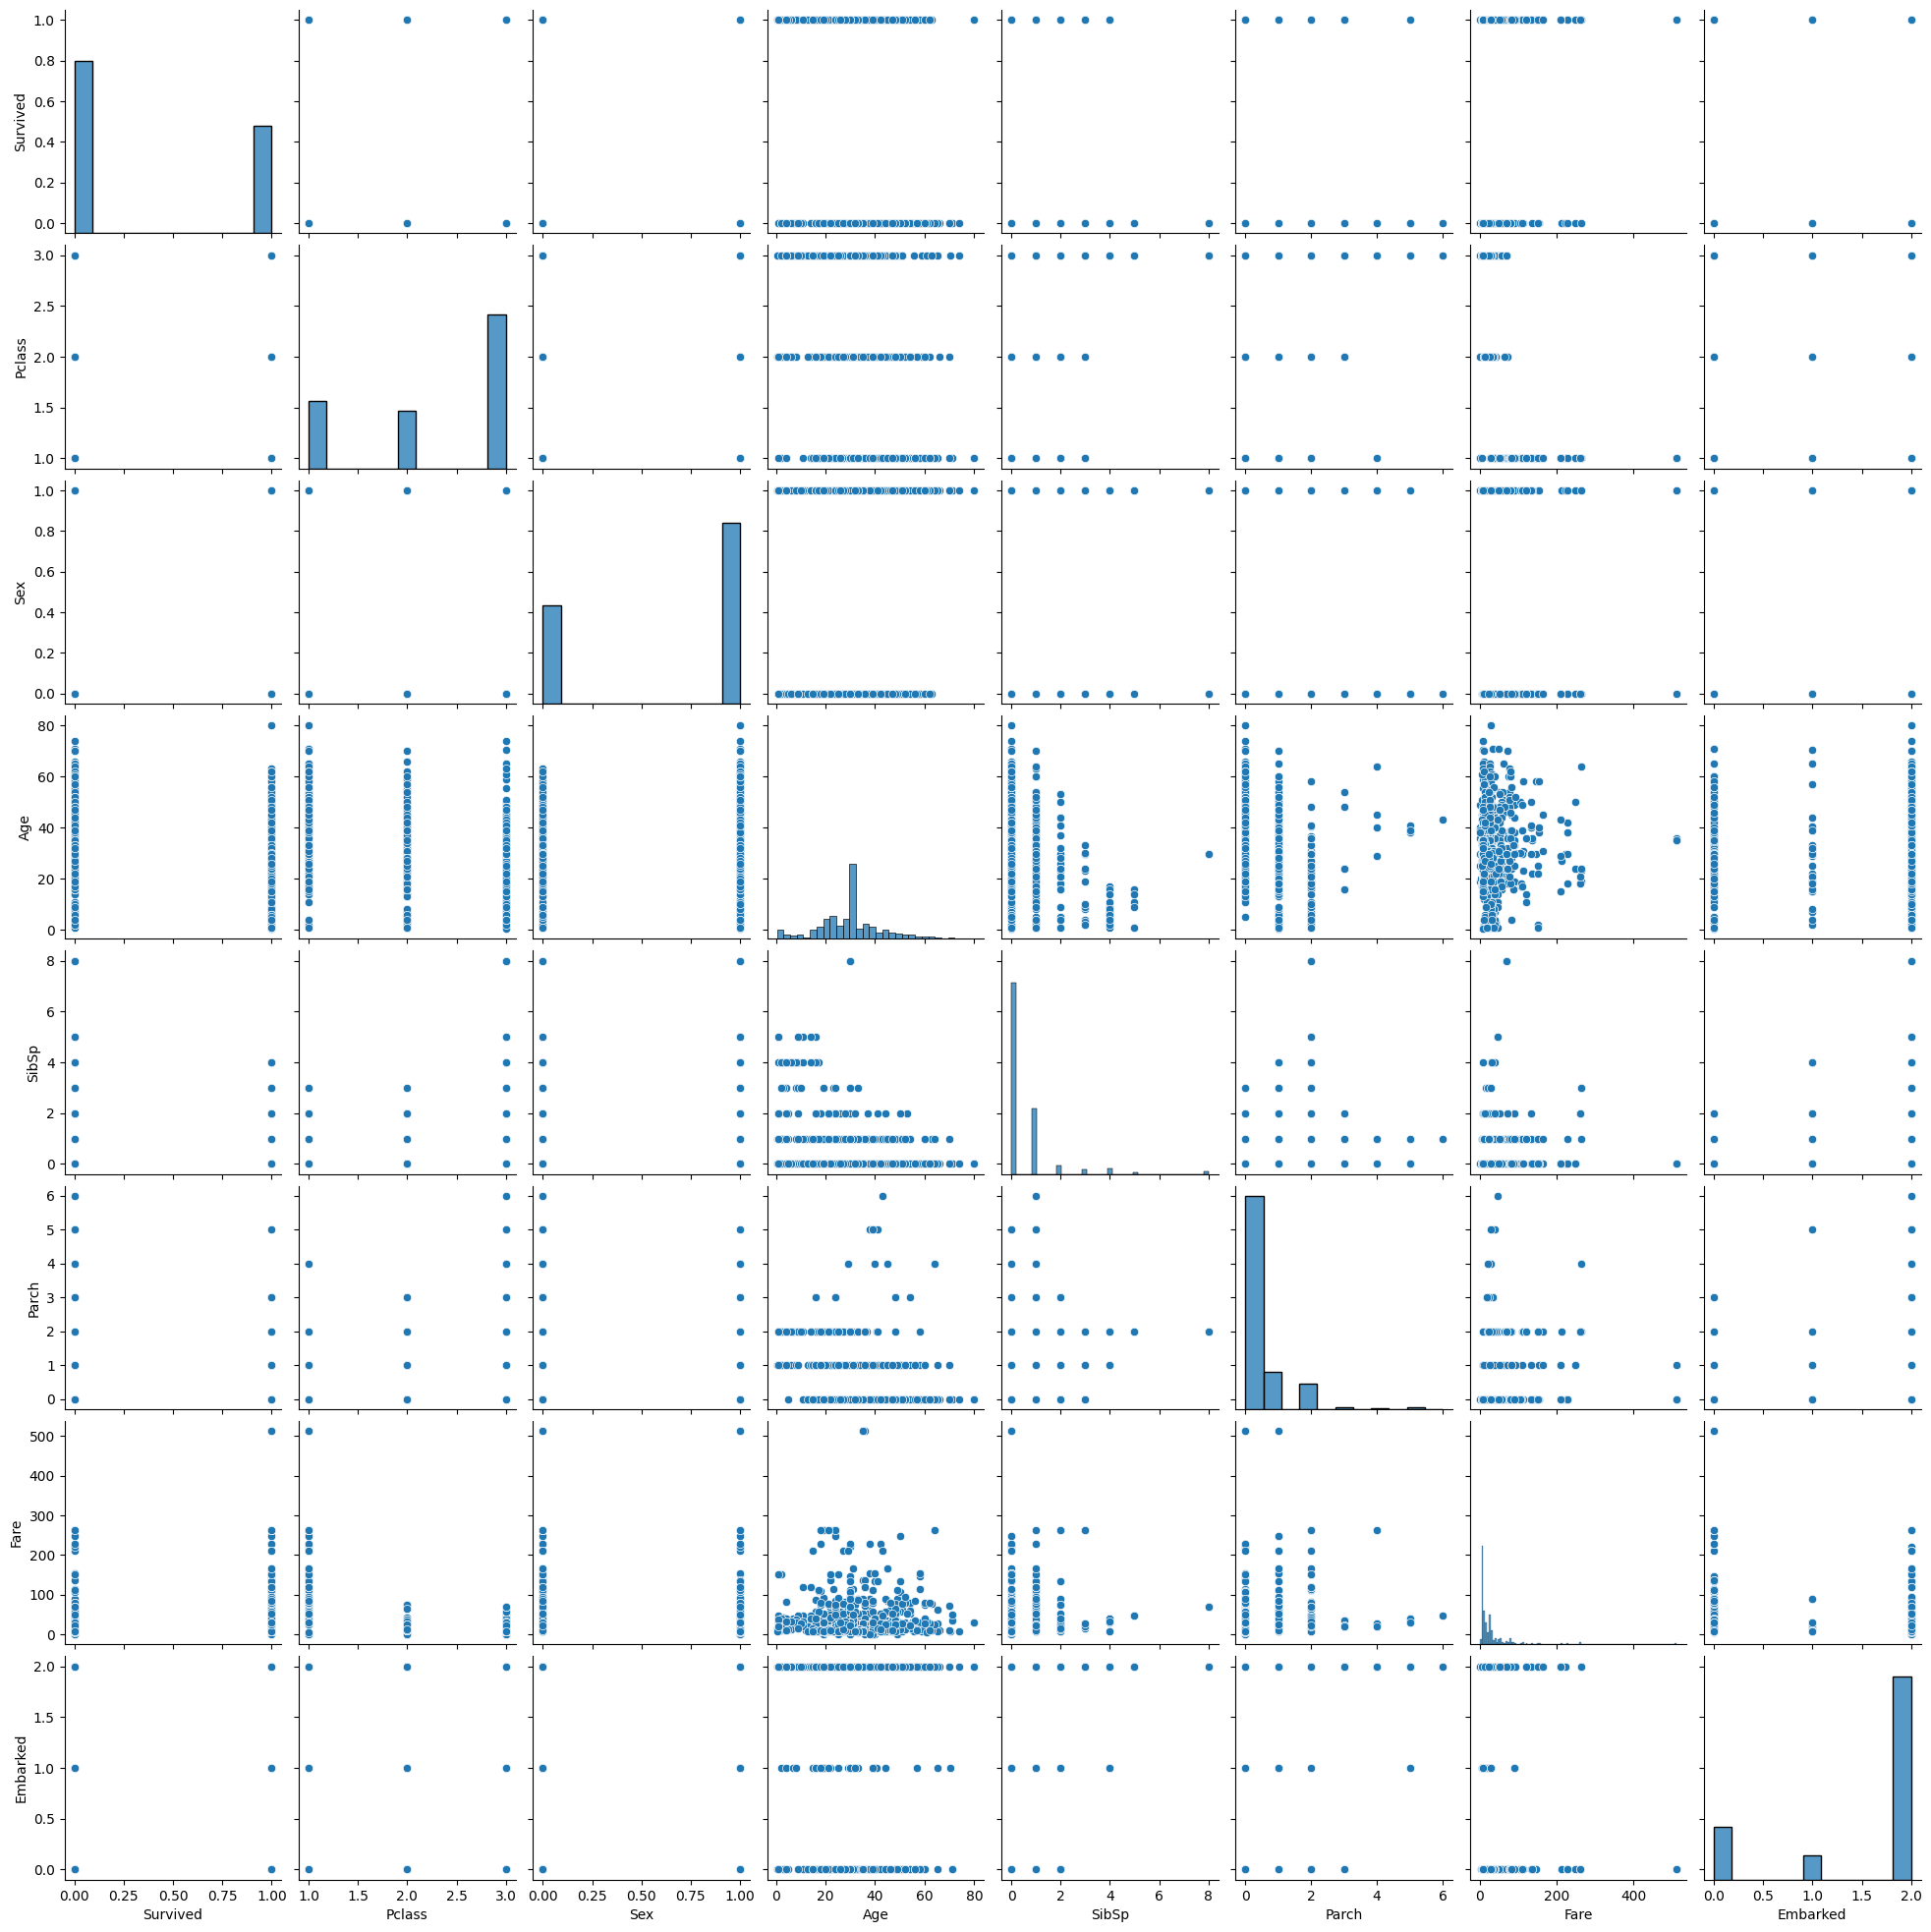

In [35]:
sns.pairplot(titanic) # Ploting pairplot
plt.show()

In [36]:
fig = px.scatter(titanic,x='Age',y='Fare',color='Fare',template='plotly_dark') # Ploting scatter plot for age and fare column
fig.update_layout(title='Scatter Plot for Age and Fare Column',
                 title_x=0.5,
                 xaxis_title='Age',
                 yaxis_title='Fare')
fig.show()

In [37]:
from sklearn.model_selection import train_test_split # Importing neccesary libraries for model building
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [38]:
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Splitting the dataset into train and test

In [40]:
xgb_model = xgb.XGBClassifier() # Accessing the xgboost model

In [41]:
xgb_model.fit(X_train,y_train) # training xgboost model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
y_pred = xgb_model.predict(X_test) #predicting the test values

In [43]:
print("Accuracy Score:",accuracy_score(y_test,y_pred)) #Printing the accuracy score

Accuracy Score: 0.7988826815642458


In [44]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred)) #Printing the confusion matrix

Confusion Matrix:
 [[89 16]
 [20 54]]


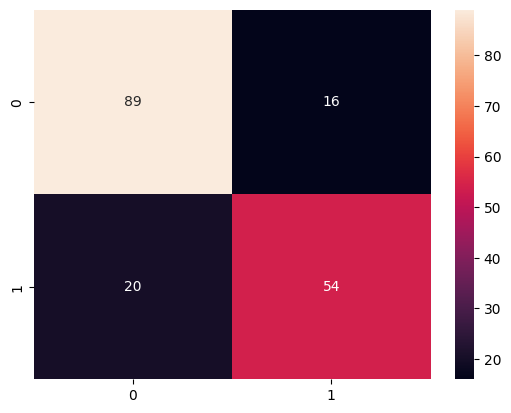

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True) #Ploting the confusion matrix
plt.show()

In [46]:
print("Classification Report:\n",classification_report(y_test,y_pred)) # Printing classification report

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [47]:
lgb_model = lgb.LGBMClassifier() # Building lightboost model

In [48]:
lgb_model.fit(X_train,y_train) # Training lightboost model

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [49]:
y_pred = lgb_model.predict(X_test) # Predicting the test values

In [50]:
print("Accuracy Score:",accuracy_score(y_test,y_pred)) # Printing accuracy score

Accuracy Score: 0.8212290502793296


In [51]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred)) # Printing confusion matrix

Confusion Matrix:
 [[89 16]
 [16 58]]


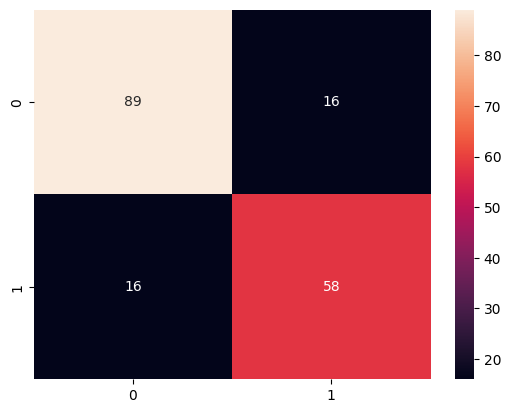

In [52]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True) # Ploting confusion matrix
plt.show()

In [53]:
print("Classification Report:\n",classification_report(y_test,y_pred)) # Printing classification report

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



In [75]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [76]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 300, 500],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print(f"Best params: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best accuracy: 0.8384516891559144


In [77]:
# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred1 = best_model.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test, y_pred1)
print(f"Test accuracy: {accuracy}") # Printing accuracy

Test accuracy: 0.8100558659217877


In [79]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred1)) # Printing confusion matrix

Confusion Matrix:
 [[94 11]
 [23 51]]


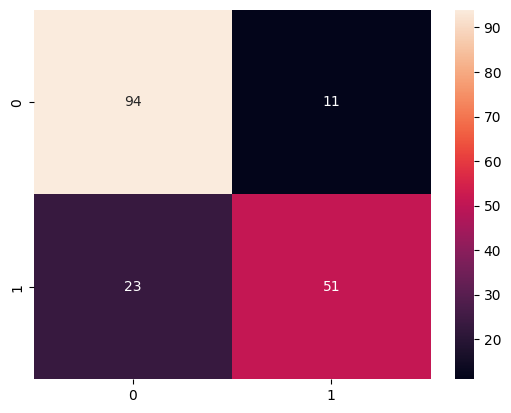

In [80]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True) # Ploting confusion matrix
plt.show()

In [81]:
print("Classification Report:\n",classification_report(y_test,y_pred1)) # Printing classification report

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [82]:
# Define the parameter grid for LightGBM
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20],
    'n_estimators': [100, 200, 500],
    'subsample': [0.7, 0.8, 1],
}

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_dist, cv=5, n_iter=50, scoring='accuracy', random_state=42, verbose=1)
random_search.fit(X_train, y_train)

# Best parameters and accuracy
print(f"Best params: {random_search.best_params_}")
print(f"Best accuracy: {random_search.best_score_}")

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [83]:
# Evaluate on test data
best_model = random_search.best_estimator_
y_pred2 = best_model.predict(X_test)

In [84]:
accuracy = accuracy_score(y_test, y_pred2)
print(f"Test accuracy: {accuracy}") # Printing accuracy

Test accuracy: 0.8435754189944135


In [85]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred2)) # Printing confusion matrix

Confusion Matrix:
 [[92 13]
 [15 59]]


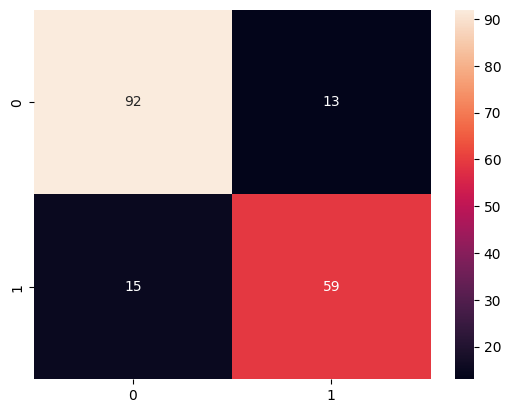

In [86]:
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True) # Ploting confusion matrix
plt.show()

In [87]:
print("Classification Report:\n",classification_report(y_test,y_pred2)) # Printing classification report

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       105
           1       0.82      0.80      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179




### **Observations**:
- **Accuracy**: LightGBM (0.84) slightly outperforms XGBoost (0.81).

- **Class 0 Performance**: LightGBM performs better in terms of precision (0.86 vs. 0.80), while XGBoost has slightly better recall (0.90 vs. 0.88).

- **Class 1 Performance**: LightGBM has higher recall (0.80 vs. 0.69), which means it captures more of the positive cases. Both models have the same precision (0.82), but LightGBM has a better F1-score (0.81 vs. 0.75).

- **Macro and Weighted Averages**: LightGBM consistently shows better macro and weighted averages across precision, recall, and F1-score, indicating it handles the class imbalance better than XGBoost.

In [88]:
from sklearn.metrics import roc_curve, auc

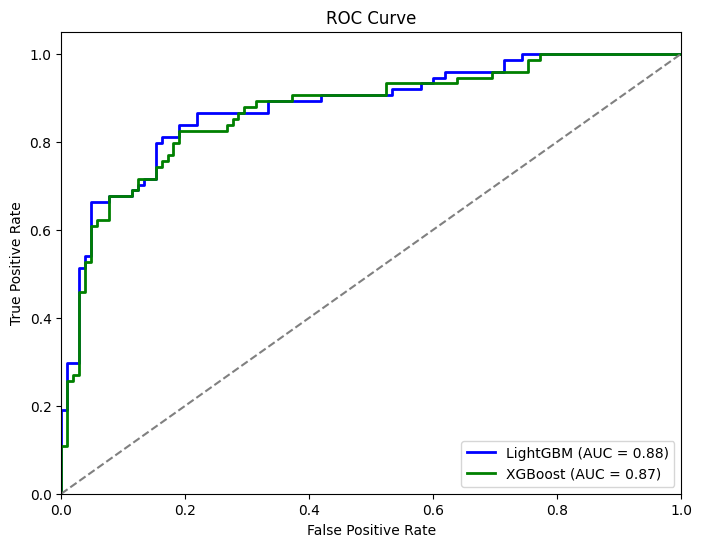

In [91]:
# LightGBM ROC curve
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, lgb_model.predict_proba(X_test)[:, 1])
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

# XGBoost ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, color='blue', lw=2, label=f'LightGBM (AUC = {roc_auc_lgb:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [92]:
from sklearn.metrics import precision_recall_curve

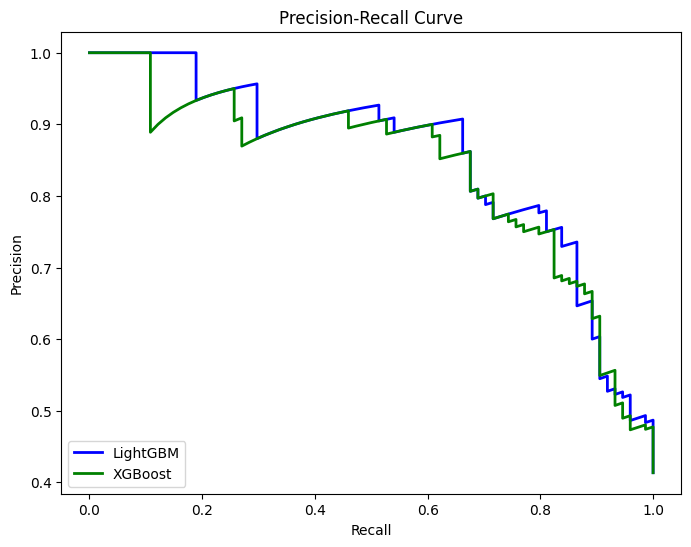

In [95]:
# LightGBM precision-recall curve
precision_lgb, recall_lgb, _ = precision_recall_curve(y_test, lgb_model.predict_proba(X_test)[:, 1])

# XGBoost precision-recall curve
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Plot Precision-Recall Curves
plt.figure(figsize=(8, 6))
plt.plot(recall_lgb, precision_lgb, color='blue', lw=2, label='LightGBM')
plt.plot(recall_xgb, precision_xgb, color='green', lw=2, label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()